In [1]:
# --- Cell 1: Load and preview data ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clash_royale_cards.csv")
df.head()


,Card,id,maxLevel,elixirCost,rarity,Win Rate,Win Rate Change,Usage,Usage Change
0,Knight,26000000,14,3.0,common,51.79,1.59,8.88,-0.24
1,Archers,26000001,14,3.0,common,46.10,0.66,1.44,0.00
2,Goblins,26000002,14,2.0,common,54.32,1.04,3.60,0.00
3,Giant,26000003,12,5.0,rare,59.10,1.10,2.32,-0.08
4,P.E.K.K.A,26000004,9,7.0,epic,50.61,1.65,3.28,-0.16


In [2]:
# --- Cell 2: Preprocessing and Cleaning ---

df.isnull().sum()


Card               0
id                 0
maxLevel           0
elixirCost         1
rarity             0
Win Rate           0
Win Rate Change    0
Usage              0
Usage Change       0
dtype: int64

In [3]:
# --- Cell 3: Summary statistics and data types ---

df.describe()

df.dtypes


Card                object
id                   int64
maxLevel             int64
elixirCost         float64
rarity              object
Win Rate           float64
Win Rate Change    float64
Usage              float64
Usage Change       float64
dtype: object

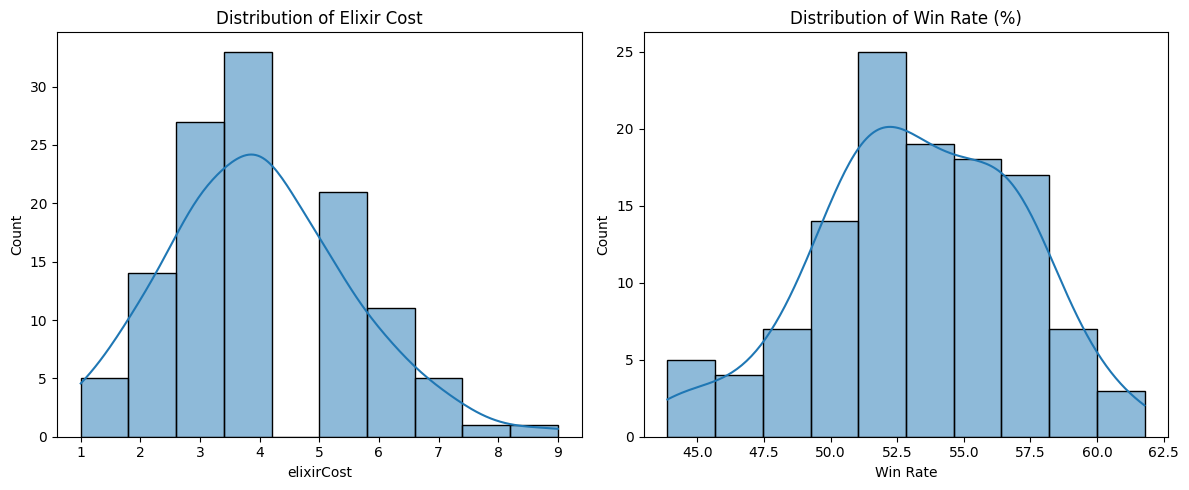

In [4]:
plt.figure(figsize=(12, 5))

# Elixir Cost distribution
plt.subplot(1, 2, 1)
sns.histplot(df['elixirCost'].dropna(), bins=10, kde=True)
plt.title("Distribution of Elixir Cost")

# Win Rate distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Win Rate'].dropna(), bins=10, kde=True)
plt.title("Distribution of Win Rate (%)")

plt.tight_layout()
plt.show()

/tmp/ipykernel_22351/4211030226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_winrate, x='Win Rate', y='Card', palette='viridis')


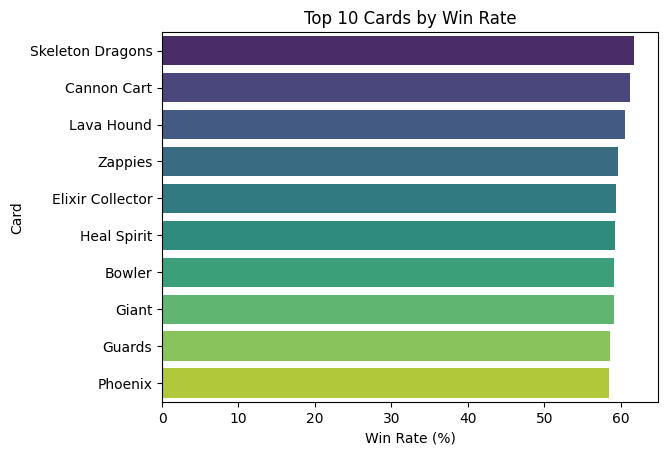

,Card,Win Rate
72,Skeleton Dragons,61.78
54,Cannon Cart,61.19
29,Lava Hound,60.53
52,Zappies,59.60
92,Elixir Collector,59.31
114,Heal Spirit,59.30
34,Bowler,59.11
3,Giant,59.10
25,Guards,58.65
76,Phoenix,58.40


In [5]:
# --- Cell 5: Top 10 cards by win rate ---
top_winrate = df.sort_values(by='Win Rate', ascending=False).head(10)

sns.barplot(data=top_winrate, x='Win Rate', y='Card', palette='viridis')
plt.title('Top 10 Cards by Win Rate')
plt.xlabel('Win Rate (%)')
plt.ylabel('Card')
plt.show()

top_winrate[['Card', 'Win Rate']]


In [6]:
# --- Cell 6: Top 10 cards by usage rate ---
top_usage = df.sort_values(by='usage', ascending=False).head(10)

sns.barplot(data=top_usage, x='usage', y='card', palette='magma')
plt.title('Top 10 Cards by Usage Rate')
plt.xlabel('Usage (%)')
plt.ylabel('Card')
plt.show()

top_usage[['card', 'usage']]


KeyError: 'usage'

In [ ]:
# --- Cell 7: Average win rate by rarity ---

rarity_winrate = df.groupby('rarity')['win_rate'].mean().sort_values(ascending=False)

rarity_winrate.plot(kind='barh', color='skyblue')
plt.title('Average Win Rate by Rarity')
plt.xlabel('Win Rate (%)')
plt.ylabel('Rarity')
plt.show()

rarity_winrate


In [ ]:
# --- Cell 8: Scatter plot of elixir cost vs. win rate ---

sns.scatterplot(data=df, x='elixircost', y='win_rate', hue='rarity')
plt.title('Elixir Cost vs. Win Rate')
plt.xlabel('Elixir Cost')
plt.ylabel('Win Rate (%)')
plt.legend(title='Rarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# --- Cell 9: Top 10 cards by absolute usage change ---
df['usage_change_abs'] = df['usage_change'].abs()
top_usage_change = df.sort_values(by='usage_change_abs', ascending=False).head(10)

sns.barplot(data=top_usage_change, x='usage_change', y='card', palette='coolwarm')
plt.title('Top 10 Cards by Usage Rate Change')
plt.xlabel('Usage Change (%)')
plt.ylabel('Card')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

top_usage_change[['card', 'usage', 'usage_change']]


In [ ]:
# --- Cell 10: Best win rate per elixir cost ratio ---

df['win_per_elixir'] = df['win_rate'] / df['elixircost']
top_efficiency = df.sort_values(by='win_per_elixir', ascending=False).head(10)

sns.barplot(data=top_efficiency, x='win_per_elixir', y='card', palette='crest')
plt.title('Top 10 Cards by Win Rate per Elixir Cost')
plt.xlabel('Win Rate per Elixir')
plt.ylabel('Card')
plt.show()

top_efficiency[['card', 'win_rate', 'elixircost', 'win_per_elixir']]


In [ ]:
# --- Cell 11: Insights and Summary (Markdown) ---
"""
## 📌 Summary of Insights

1. **Top Win Rate Cards:** Cannon Cart, Skeleton Dragons, and Lava Hound dominate win percentages, suggesting strong current performance.
2. **Most Used Cards:** The Log and Arrows appear in the highest percentage of decks, signaling their versatility and reliability.
3. **Rarity and Strength:** Champion and Epic cards generally outperform others in win rate, but Common cards like Skeletons and Goblin Gang remain highly effective.
4. **Elixir Cost Balance:** No strong correlation between elixir cost and win rate — both low and high-cost cards can perform well if used strategically.
5. **Trending Cards:** Cards like Battle Healer and Skeleton Dragons are rising in both win rate and usage, possibly due to balance updates or shifting metas.
6. **Efficiency Matters:** Skeletons and other low-cost cards provide high win rate per elixir, making them staples in competitive decks.

### 🎯 Actionable Insight
When building decks, consider not only power and popularity but also efficiency — maximizing performance per elixir. Tracking trending cards can give you a strategic edge as the meta evolves.
"""
